In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy
from sklearn.ensemble import RandomForestClassifier

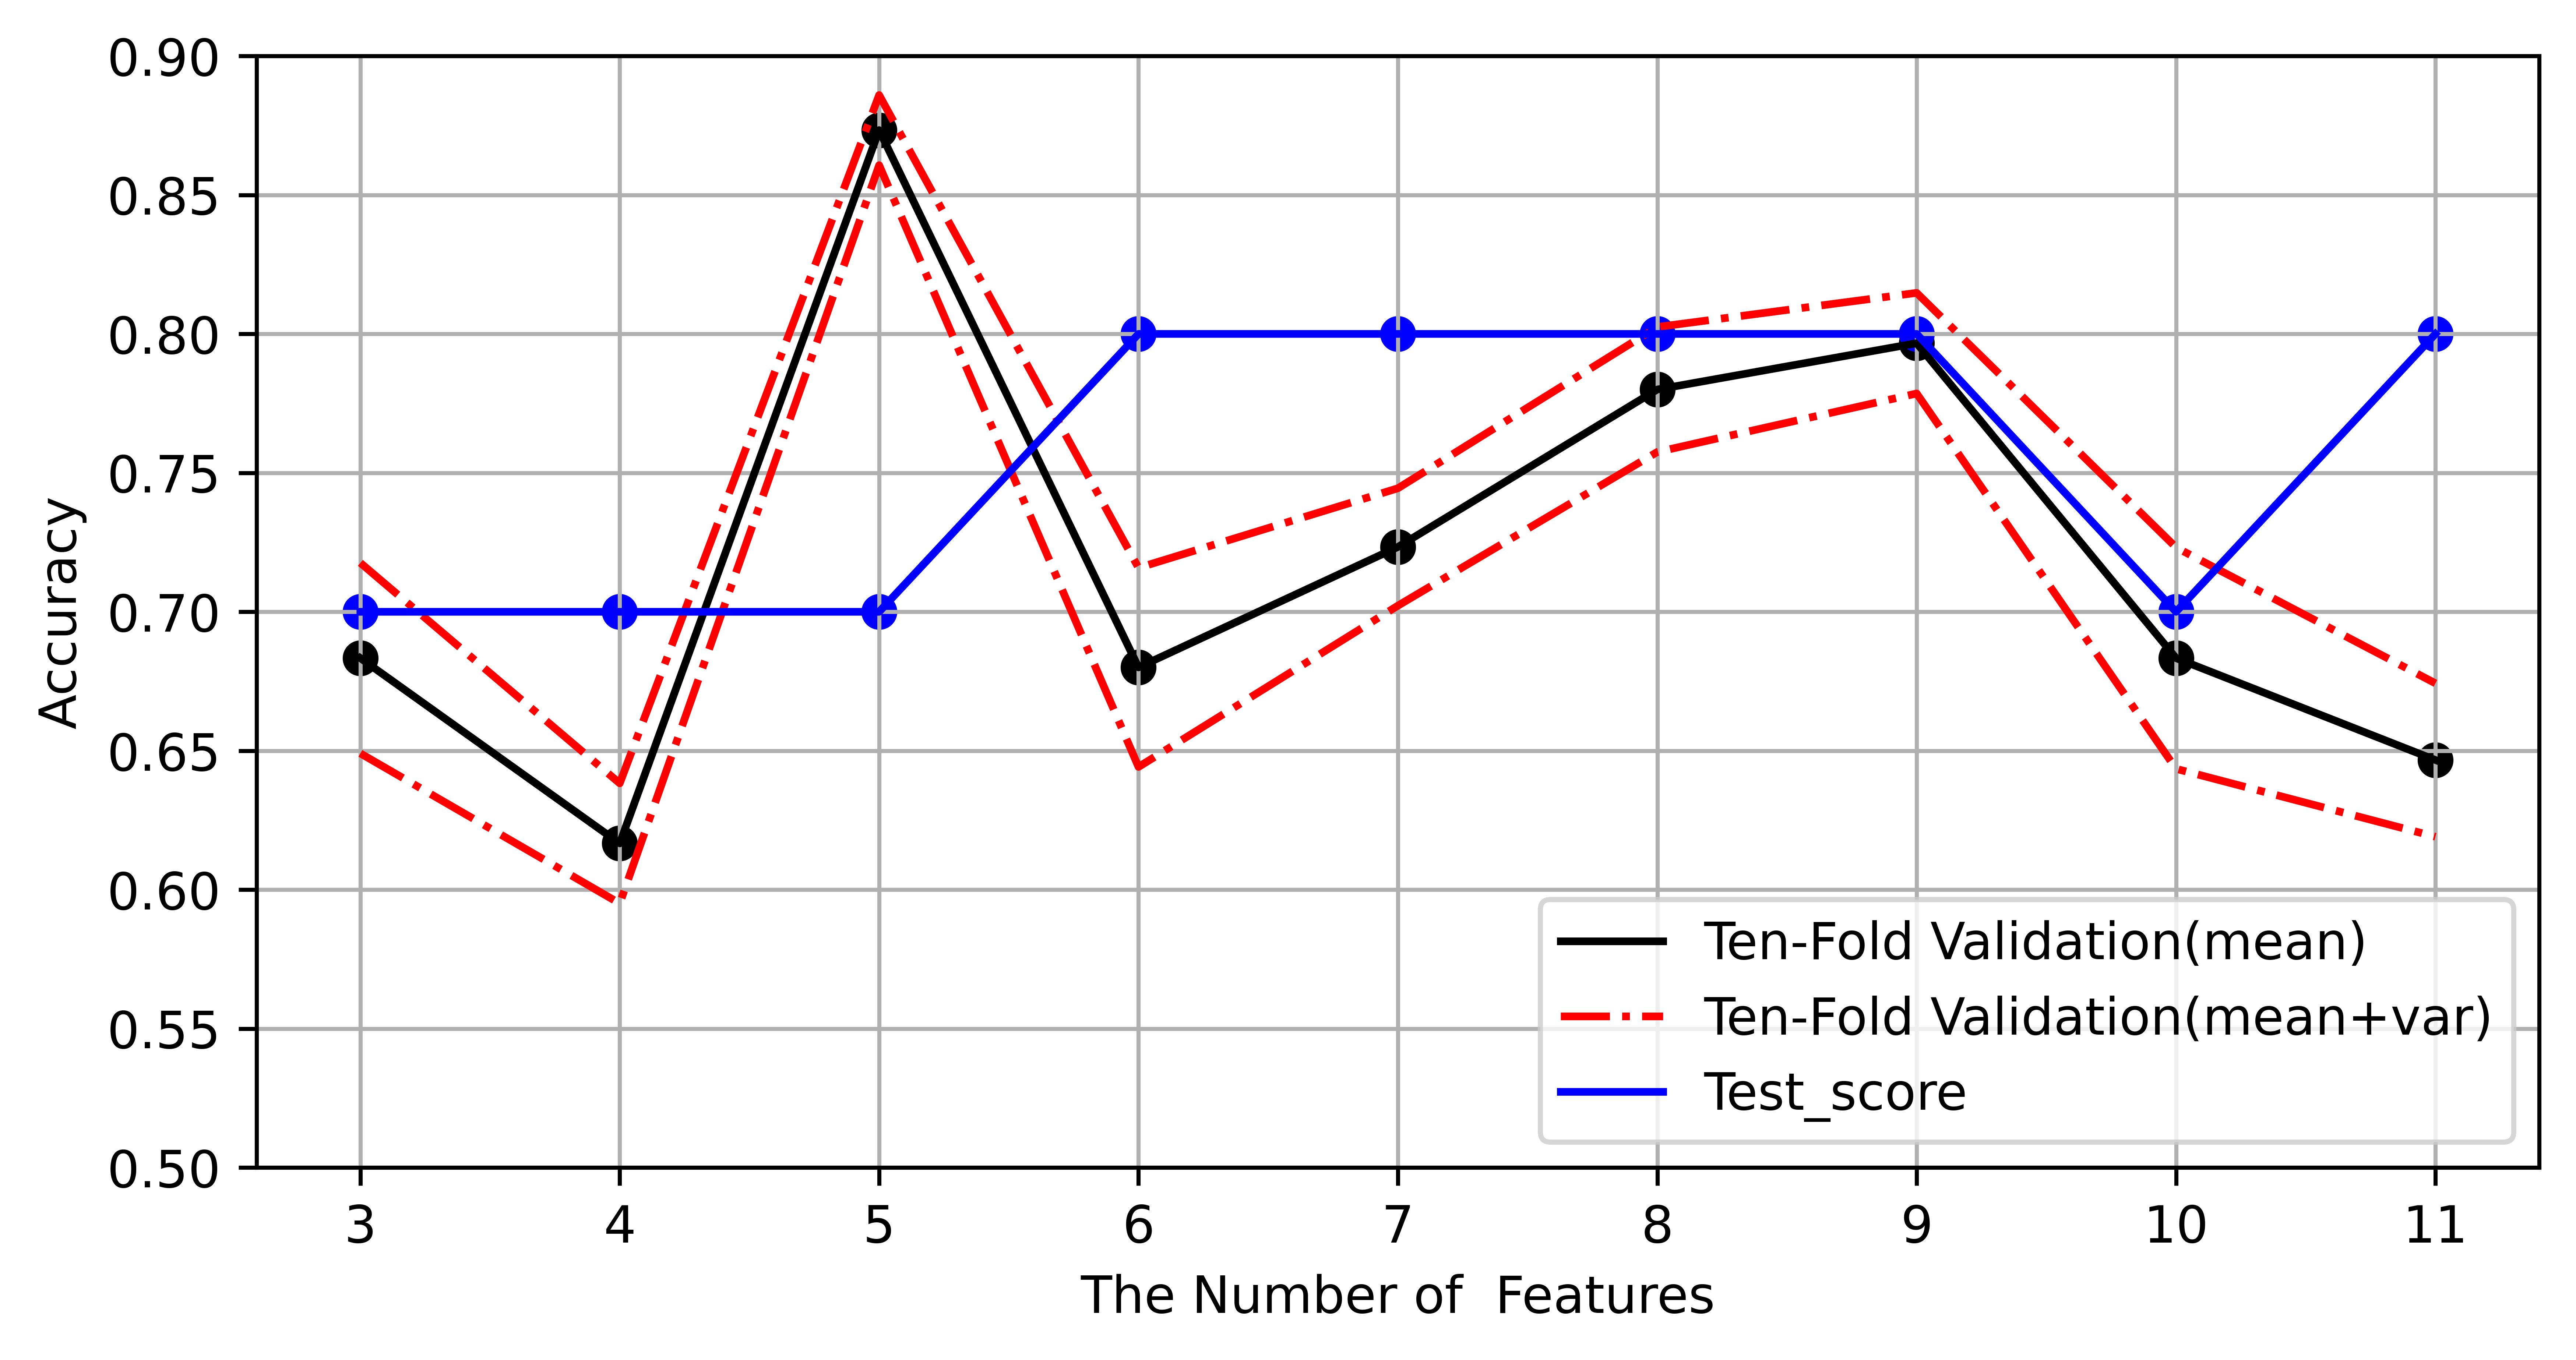

In [7]:
df =pd.read_csv('RFC_data.csv')
mean_=[]
var_ =[]
ts_ = []
for i in range(4,13):
        X = df.iloc[:,1:i]
        y = df.iloc[:,16]
        X_train,X_test,y_train,y_test = TTS (X,y,test_size = 0.15,random_state = 9,stratify = y)
        RF = make_pipeline(
            make_union(
                make_union(StackingEstimator(estimator=RandomForestClassifier(max_depth=4, max_features=0.2, min_samples_leaf=4, min_samples_split=9, n_estimators=11, random_state=8)),
            FunctionTransformer(copy)),
                make_union(FunctionTransformer(copy),FunctionTransformer(copy))),
            RandomForestClassifier(max_depth=6, max_features=0.3, min_samples_leaf=5, min_samples_split=13, n_estimators=21, random_state=10))
        RF.fit(X_train, y_train)
        ts = RF.score(X_test,y_test)
        CSV_ = CSV(RF,X_train,y_train,cv=10)
        mean = CSV_.mean()
        var = CSV_.var()
        mean_.append(mean)
        var_.append(var)
        ts_.append(ts)       
axis = range(3,12)
mean_ = np.array(mean_)
var_ = np.array(var_)
ts_ = np.array(ts_)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=1000)
plt.plot(axis,mean_,c='black',label = 'Ten-Fold Validation(mean)')
plt.scatter(axis,mean_,c='black')
plt.plot(axis,mean_+ var_,c= 'red',linestyle = '-.',label = 'Ten-Fold Validation(mean+var)')
plt.plot(axis,mean_- var_,c= 'red',linestyle = '-.')
plt.plot(axis,ts_ ,c = 'blue',label = 'Test_score')
plt.scatter(axis,ts_,c='blue')
plt.xlabel('The Number of  Features')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc=4)
plt.ylim(0.5,0.9)
plt.show()